## 评估子任务的成功率

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [7]:
resource_dir = os.path.join(os.getcwd(), 'resources/cabinet_data')
lock_sac_success_rate_frame = pd.read_csv(resource_dir + '/log_runs_IORL_LockedCabinet-v1_num_3_seed_10_8.csv')
door_sac_success_rate_frame = pd.read_csv(resource_dir + '/log_runs_IORL_LockedCabinet-v1_num_3_seed_10_8_2.csv')
lock_td3_success_rate_frame = pd.read_csv(resource_dir + '/log_runs_TD3_Cabinet-v1_num_2_seed_10_7.csv')
door_td3_success_rate_frame = pd.read_csv(resource_dir + '/log_runs_TD3_Cabinet-v1_num_2_seed_10_7_2.csv')
lock_her_success_rate_frame = pd.read_csv(resource_dir + '/log_runs_IORL_LockedCabinet-v1_num_1_seed_10_6.csv')
door_her_success_rate_frame = pd.read_csv(resource_dir + '/log_runs_IORL_LockedCabinet-v1_num_1_seed_10_6_2.csv')

lock_sac_success_rate = lock_sac_success_rate_frame['Value']
door_sac_success_rate = door_sac_success_rate_frame['Value']
timesteps_sac = lock_sac_success_rate_frame['Step']

lock_td3_success_rate = lock_td3_success_rate_frame['Value']
door_td3_success_rate = door_td3_success_rate_frame['Value']
timesteps_td3 = lock_td3_success_rate_frame['Step']

lock_her_success_rate = lock_her_success_rate_frame['Value']
door_her_success_rate = door_her_success_rate_frame['Value']
timesteps_her = lock_her_success_rate_frame['Step']

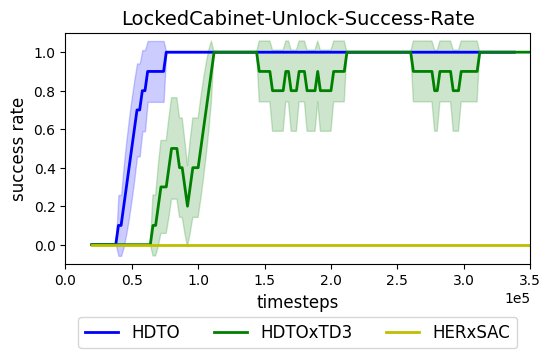

In [8]:
lock_sac_success_rate_mean = lock_sac_success_rate.rolling(10).mean()
lock_sac_success_rate_std = lock_sac_success_rate.rolling(10).std()

lock_td3_success_rate_mean = lock_td3_success_rate.rolling(10).mean()
lock_td3_success_rate_std = lock_td3_success_rate.rolling(10).std()

lock_her_success_rate_mean = lock_her_success_rate.rolling(10).mean()
lock_her_success_rate_std = lock_her_success_rate.rolling(10).std()

plt.figure(dpi=100,figsize=(6,3))
plt.plot(timesteps_sac, lock_sac_success_rate_mean, 'b', linewidth=2.0, label='HDTO')
plt.fill_between(timesteps_sac, lock_sac_success_rate_mean - 0.5 * lock_sac_success_rate_std, lock_sac_success_rate_mean + 0.5 * lock_sac_success_rate_std,color='b', alpha=0.2)
plt.plot(timesteps_td3, lock_td3_success_rate_mean, 'g', linewidth=2.0, label='HDTOxTD3')
plt.fill_between(timesteps_td3, lock_td3_success_rate_mean - 0.5 * lock_td3_success_rate_std, lock_td3_success_rate_mean + 0.5 * lock_td3_success_rate_std,color='g', alpha=0.2)
plt.plot(timesteps_her, lock_her_success_rate_mean, 'y', linewidth=2.0, label='HERxSAC')
plt.fill_between(timesteps_her, lock_her_success_rate_mean - 0.5 * lock_her_success_rate_std, lock_her_success_rate_mean + 0.5 * lock_her_success_rate_std,color='y', alpha=0.2)

# set axis range
plt.xlim(0, 3.5e5)
plt.ylim(-0.1, 1.1)

# set axis label
plt.xlabel('timesteps', fontsize=12)
plt.ylabel('success rate', fontsize=12)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
# plt.tick_params(axis='both', labelsize=14)
# X、Y轴刻度标签字体大小
matplotlib.rcParams['axes.labelsize'] = 14

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.4), ncol=5, fontsize=12)

plt.title('LockedCabinet-Unlock-Success-Rate', fontsize=14)
# save figure
plt.savefig('resources/images/lockCabinet-success-rate-unlock.png', bbox_inches='tight')

plt.show()

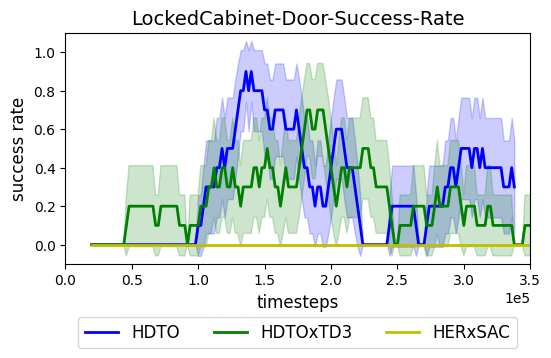

In [11]:
door_sac_success_rate_mean = door_sac_success_rate.rolling(10).mean()
door_sac_success_rate_std = door_sac_success_rate.rolling(10).std()

door_td3_success_rate_mean = door_td3_success_rate.rolling(10).mean()
door_td3_success_rate_std = door_td3_success_rate.rolling(10).std()

door_her_success_rate_mean = door_her_success_rate.rolling(10).mean()
door_her_success_rate_std = door_her_success_rate.rolling(10).std()

plt.figure(dpi=100,figsize=(6,3))

plt.plot(timesteps_sac, door_sac_success_rate_mean, 'b', linewidth=2.0, label='HDTO')
plt.fill_between(timesteps_sac, door_sac_success_rate_mean - 0.5 * door_sac_success_rate_std, door_sac_success_rate_mean + 0.5 * door_sac_success_rate_std, color='b', alpha=0.2)
plt.plot(timesteps_td3, door_td3_success_rate_mean, 'g', linewidth=2.0, label='HDTOxTD3')
plt.fill_between(timesteps_td3, door_td3_success_rate_mean - 0.5 * door_td3_success_rate_std, door_td3_success_rate_mean + 0.5 * door_td3_success_rate_std,color='g', alpha=0.2)
plt.plot(timesteps_her, door_her_success_rate_mean, 'y', linewidth=2.0, label='HERxSAC')
plt.fill_between(timesteps_her, door_her_success_rate_mean - 0.5 * door_her_success_rate_std, door_her_success_rate_mean + 0.5 * door_her_success_rate_std,color='y', alpha=0.2)

# set axis range
plt.xlim(0, 3.5e5)
plt.ylim(-0.1, 1.1)

# set axis label
plt.xlabel('timesteps', fontsize=12)
plt.ylabel('success rate', fontsize=12)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
# plt.tick_params(axis='both', labelsize=14)
# X、Y轴刻度标签字体大小
matplotlib.rcParams['axes.labelsize'] = 14
# plt.yticks(size = 14)
# plt.xticks(size = 14)

# display legend
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.4), ncol=5, fontsize=12)

plt.title('LockedCabinet-Door-Success-Rate', fontsize=14)
# save figure
plt.savefig('resources/images/LockedCabinet-Success-Rate-Door.png', bbox_inches='tight')

plt.show()